### Könyvtárak importálása

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Adatok

In [146]:
tömb = [3430, 2490, 7995, 5625, 4860, 2935, 6105, 14525, 4100, 3780, 7520, 11005,
        6220, 6480, 4460, 6730, 5975, 7365, 5130, 2680, 3945, 5480, 6220, 3210, 8685]

rendezett_tömb = np.array(sorted(tömb))
rendezett_tömb

array([ 2490,  2680,  2935,  3210,  3430,  3780,  3945,  4100,  4460,
        4860,  5130,  5480,  5625,  5975,  6105,  6220,  6220,  6480,
        6730,  7365,  7520,  7995,  8685, 11005, 14525])

### Osztályközök készítése

In [129]:
def osztályköz(tömb, osztályok_száma):
    osztályok = []
    tömb = np.array(sorted(tömb))
    
    osztály_méret = (tömb[-1] - tömb[0]) / osztályok_száma
    osztály = tömb[0] + osztály_méret
    lista = []
    
    for i, x in enumerate(tömb):
        if (x <= osztály):
            lista.append(x)
            if (i == len(tömb)-1):
                osztályok.append(lista)
                
        else:
            osztályok.append(lista)
            lista = [x]
            osztály += osztály_méret
            if (i == len(tömb)-1):
                osztályok.append(lista)
            
    return osztályok
    
osztályköz(tömb, 5)

[[2490, 2680, 2935, 3210, 3430, 3780, 3945, 4100, 4460, 4860],
 [5130, 5480, 5625, 5975, 6105, 6220, 6220, 6480, 6730],
 [7365, 7520, 7995, 8685],
 [11005],
 [14525]]

### Osztályközök gyakoriságai

In [153]:
df = pd.DataFrame(osztályköz(tömb, 5)).T
for i in df:
    print(dict(df[i].value_counts()))

{4860.0: 1, 4460.0: 1, 4100.0: 1, 3945.0: 1, 3780.0: 1, 3430.0: 1, 3210.0: 1, 2935.0: 1, 2680.0: 1, 2490.0: 1}
{6220.0: 2, 6730.0: 1, 6480.0: 1, 6105.0: 1, 5975.0: 1, 5625.0: 1, 5480.0: 1, 5130.0: 1}
{8685.0: 1, 7995.0: 1, 7520.0: 1, 7365.0: 1}
{11005.0: 1}
{14525.0: 1}


### Gini és Lorenz-görbe

Függvények írása

In [156]:
def gini(arr):
    count = arr.size
    coefficient = 2 / count
    indexes = np.arange(1, count + 1)
    weighted_sum = (indexes * arr).sum()
    total = arr.sum()
    constant = (count + 1) / count
    
    return coefficient * weighted_sum / total - constant

def lorenz(arr):
    scaled_prefix_sum = arr.cumsum() / arr.sum()

    return np.insert(scaled_prefix_sum, 0, 0)

def gini_lorenz(arr):
    print('Gini: ', gini(arr))
    lorenz_curve = lorenz(arr)

    plt.figure(figsize=(12, 7))
    plt.plot(np.linspace(0.0, 1.0, lorenz_curve.size), lorenz_curve)
    plt.plot([0,1], [0,1])    
    plt.title('Lorenz-Curve', size=14)

Függvény hívása

Gini:  0.23765906771010537


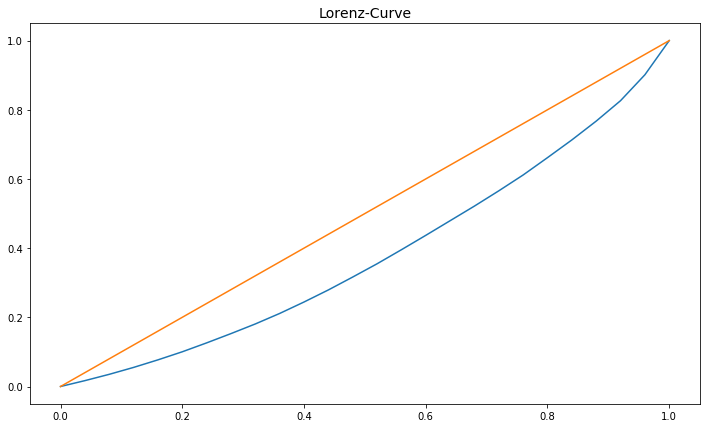

In [155]:
gini_lorenz(rendezett_tömb)

### Egymástól való átlagos eltérés

In [177]:
def egymástól_átlagos_eltérés(arr):
    össz = 0

    for i in arr:
        for j in arr:
            össz += abs(i - j)

    return (össz / (len(arr))**2)

egymástól_átlagos_eltérés(tömb)

2793.92

### Koncentráció

In [157]:
def koncentráció(arr):
    return gini(arr) / (2*arr.mean())

koncentráció(rendezett_tömb)

2.0215980580988887e-05